<div style="text-align: center; font-size: 24px;">
   🚀🛰️ <strong>ISRO Satellite Launches - Exploratory Data Analysis</strong>
</di>


### Import required python libraries

In [1]:
# For data manipulation and analysis
import pandas as pd
# For plotting graphs
import matplotlib.pyplot as plt
# For statistical data visualization
import seaborn as sns
# For numerical operations
import numpy as np
# Identifying missing values
import missingno as msno 

### Create a dataframe from a csv file

In [7]:
# Load dataset into a DataFrame
df = pd.read_csv('ISRO mission launches.csv', encoding = 'unicode_escape')

### Inspect the loaded data

In [25]:
# Display the first 5 rows of the dataset
df.head()

,SL_No,Satellite_Name,Launch_Date,Launch_Vehicle,Orbit_Type,Application,Remarks,Launch_Year
0,1,Aryabhata,1975-04-19,C-1 Intercosmos,NaN,Experimental,Launch successful,1975
1,2,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful,1979
2,3,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,NaN,NaN,Launch unsuccessful,1979
3,4,Rohini Satellite RS-1,1980-07-18,SLV-3E2,NaN,NaN,Launch successful,1980
4,5,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful,1981


In [10]:
# Display summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SL No             125 non-null    int64 
 1   Launch Date       125 non-null    object
 2   Launch Vehicle    125 non-null    object
 3   Launch Vehicle.1  125 non-null    object
 4   Orbit Type        104 non-null    object
 5   Application       121 non-null    object
 6   Remarks           125 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


<Axes: >

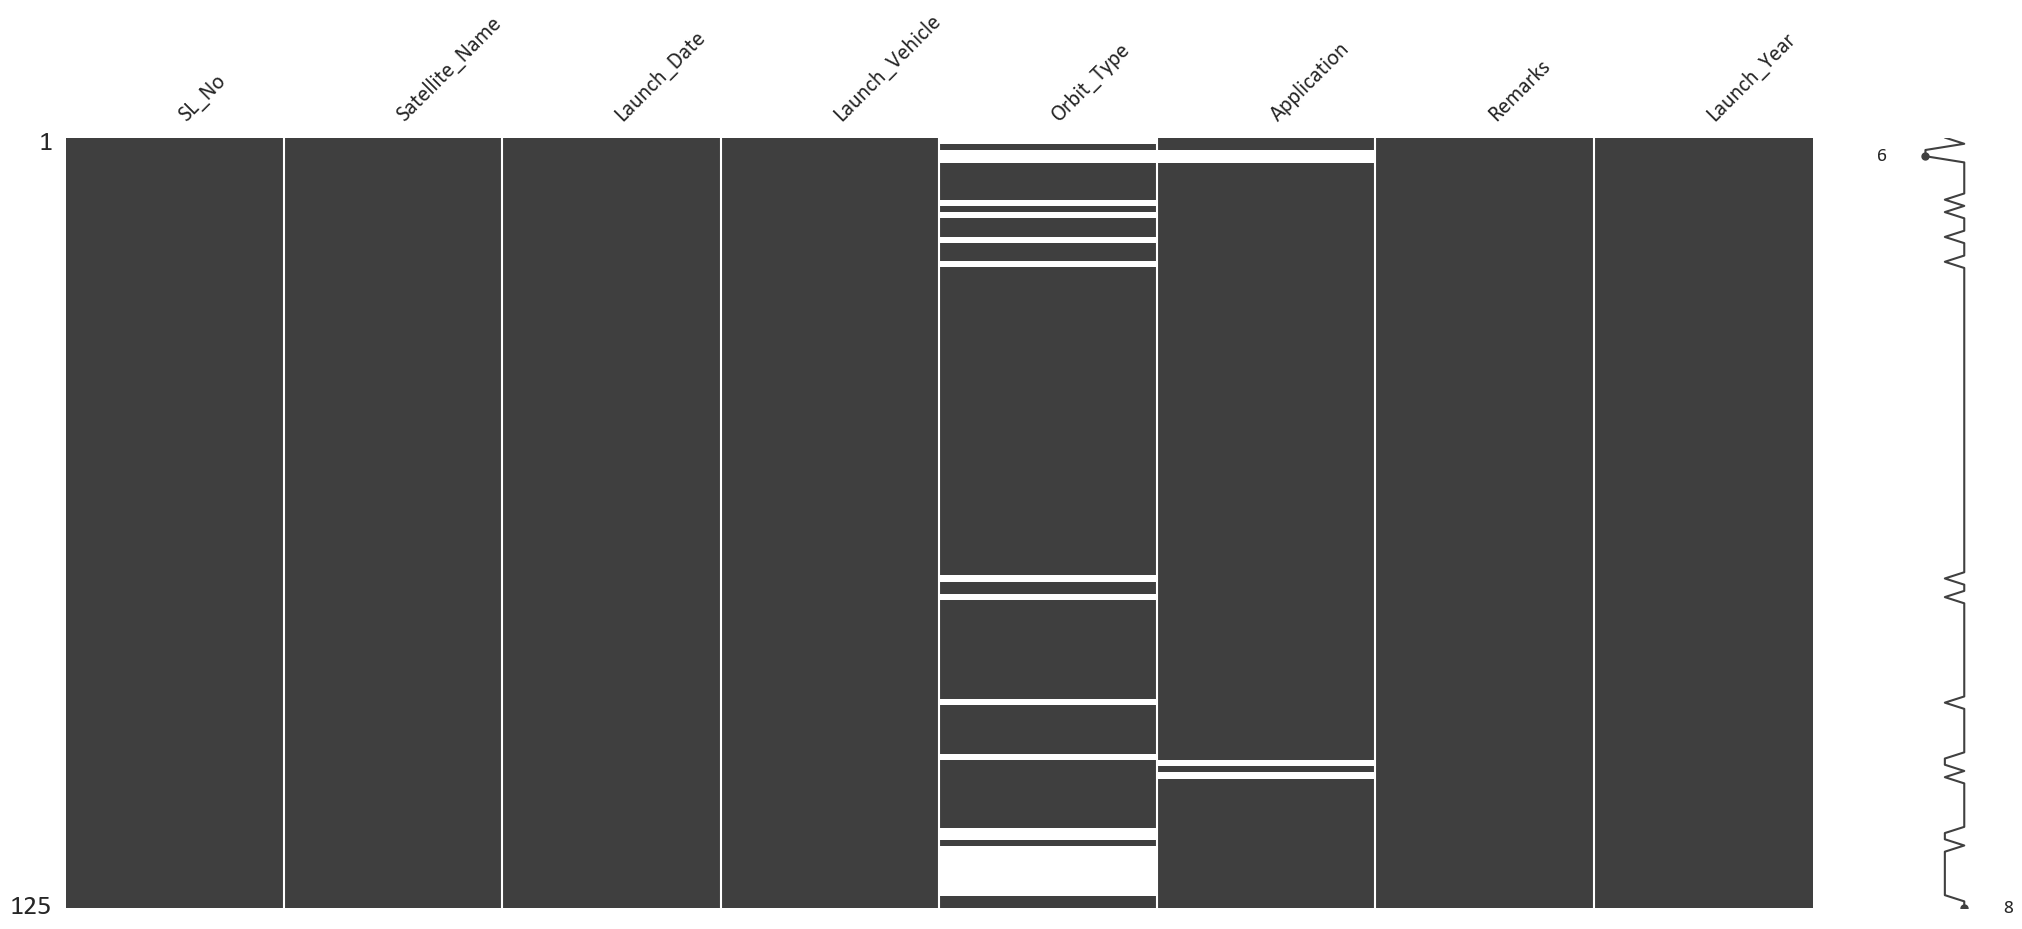

In [26]:
# Check for any missing values
msno.matrix(df)

In [11]:
# Checking for any missing values
df.isnull().sum()

SL No                0
Launch Date          0
Launch Vehicle       0
Launch Vehicle.1     0
Orbit Type          21
Application          4
Remarks              0
dtype: int64

### Renaming the columns

In [12]:
# Renaming columns to have consistent and easy-to-use names
df.columns = ['SL_No', 'Satellite_Name', 'Launch_Date', 'Launch_Vehicle', 'Orbit_Type', 'Application', 'Remarks']

In [13]:
df.head(2)

,SL_No,Satellite_Name,Launch_Date,Launch_Vehicle,Orbit_Type,Application,Remarks
0,1,Aryabhata,19-Apr-75,C-1 Intercosmos,NaN,Experimental,Launch successful
1,2,Bhaskara-I,07-Jun-79,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful


### Converting the column data type

In [15]:
# Convert the 'Launch_Date' column to datetime format for easier analysis
df['Launch_Date'] = pd.to_datetime(df['Launch_Date'], errors='coerce')
df.head(2)

,SL_No,Satellite_Name,Launch_Date,Launch_Vehicle,Orbit_Type,Application,Remarks
0,1,Aryabhata,1975-04-19,C-1 Intercosmos,NaN,Experimental,Launch successful
1,2,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful


### Plotting of graphs

#### 1. Launch Outcome

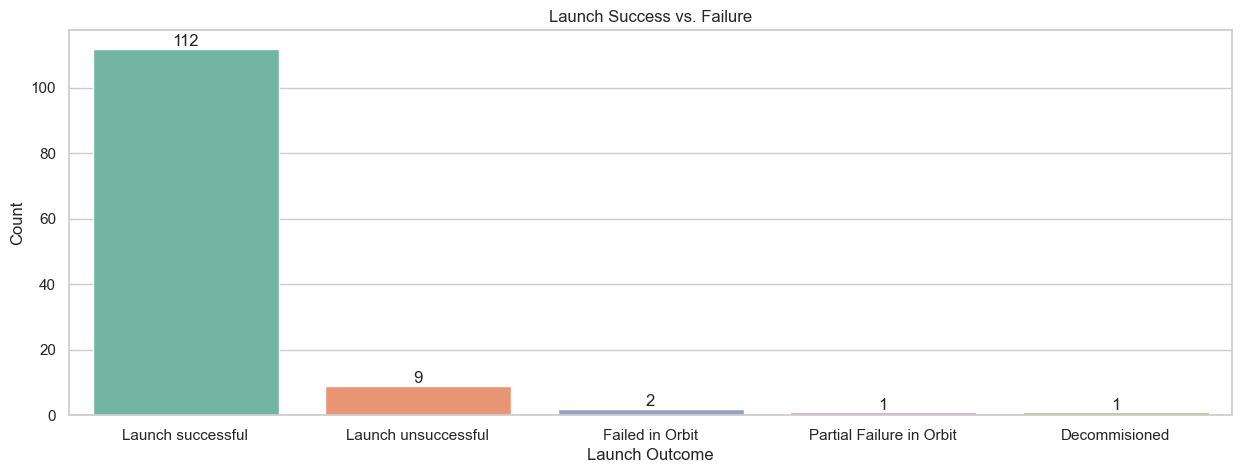

In [27]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
ax = sns.countplot(x='Remarks', hue='Remarks', data=df, palette='Set2', dodge=False, legend=False)

# Adding the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Naming the titles and labels
plt.title("Launch Success vs. Failure")
plt.xlabel("Launch Outcome")
plt.ylabel("Count")

# Display plot
plt.show()

#### 2.1 Number of Launches Per Year - Count Plot

In [18]:
# Extracting the year from 'Launch_Date' for year wise analysis
df['Launch_Year'] = df['Launch_Date'].dt.year

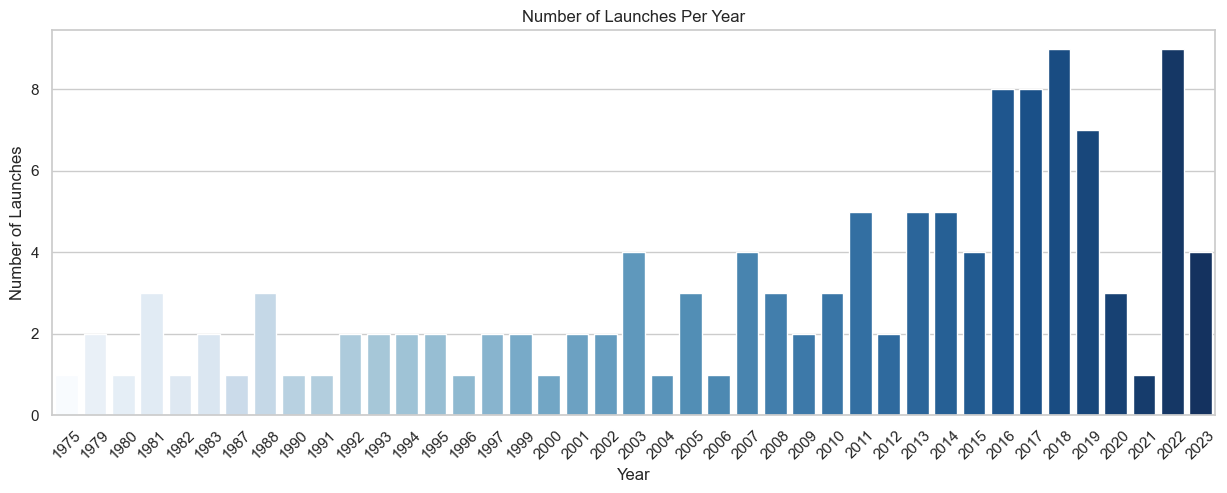

In [28]:
# Plotting the graph
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
ax = sns.countplot(x='Launch_Year', hue='Launch_Year', data=df, 
                   order=df['Launch_Year'].dropna().sort_values().unique(), 
                   palette='Blues', dodge=False, legend=False)

# Naming the titles and labels
plt.title("Number of Launches Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)

# display plot
plt.show()

#### 2.2 Number of Launches Per Year - Swarm Plot

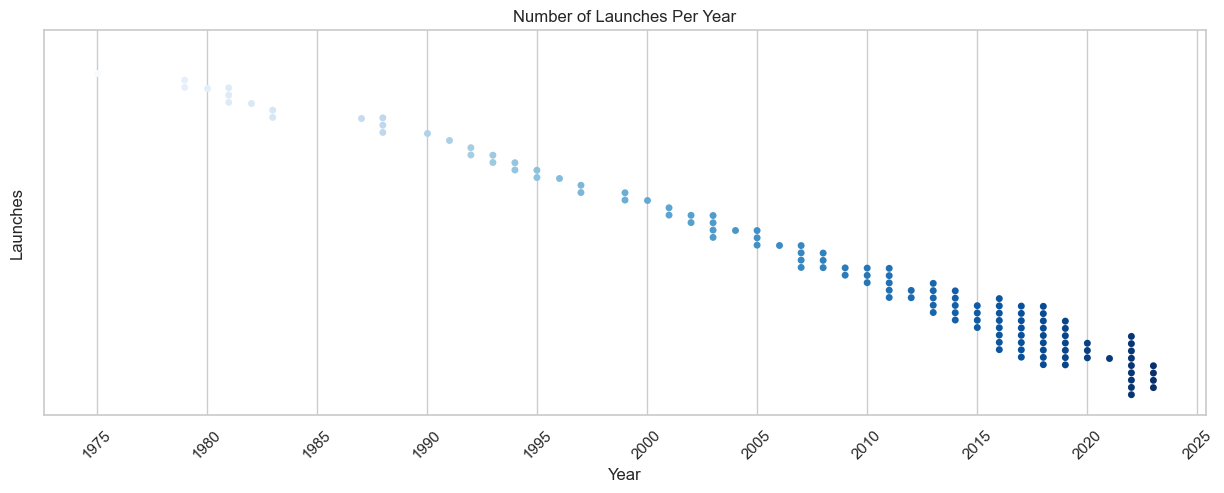

In [20]:
# Plotting the graph
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")

# Create the swarm plot
ax = sns.swarmplot(x='Launch_Year', hue='Launch_Year', data=df, 
                   palette='Blues', dodge=True, legend=False)

# Naming the titles and labels
plt.title("Number of Launches Per Year")
plt.xlabel("Year")
plt.ylabel("Launches")

# Set x-ticks to have a gap of 5 years
plt.xticks(ticks=range(df['Launch_Year'].min(), df['Launch_Year'].max() + 5, 5), rotation=45)

# display plot
plt.show()

#### 3. Distribution of Satellite across Orbit type

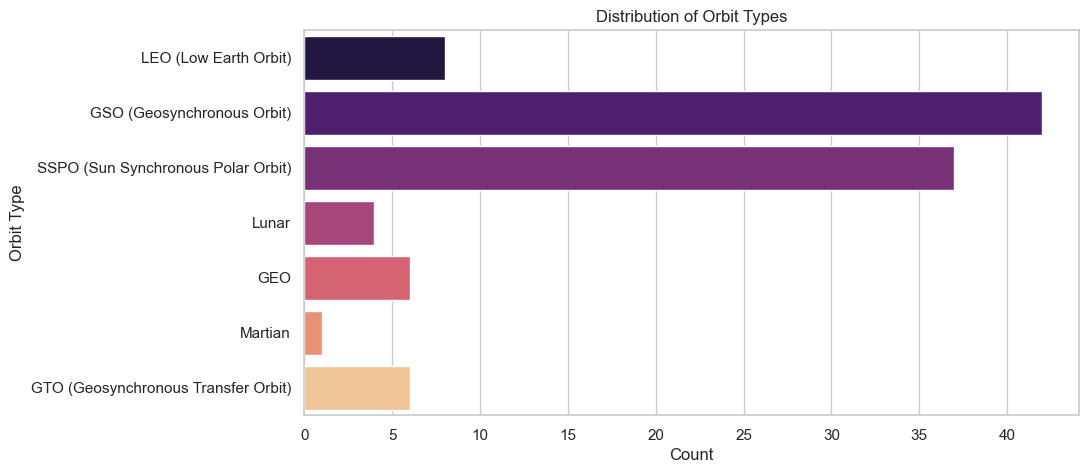

In [29]:
# Plotting the count of different orbit types
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.countplot(y='Orbit_Type', hue='Orbit_Type', data=df, 
                   palette='magma', dodge=False, legend=False)

# Naming the titles and labels
plt.title("Distribution of Orbit Types")
plt.xlabel("Count")
plt.ylabel("Orbit Type")

# display plot
plt.show()

#### 4. Pivot graph of the number of satellites launched by year and application.

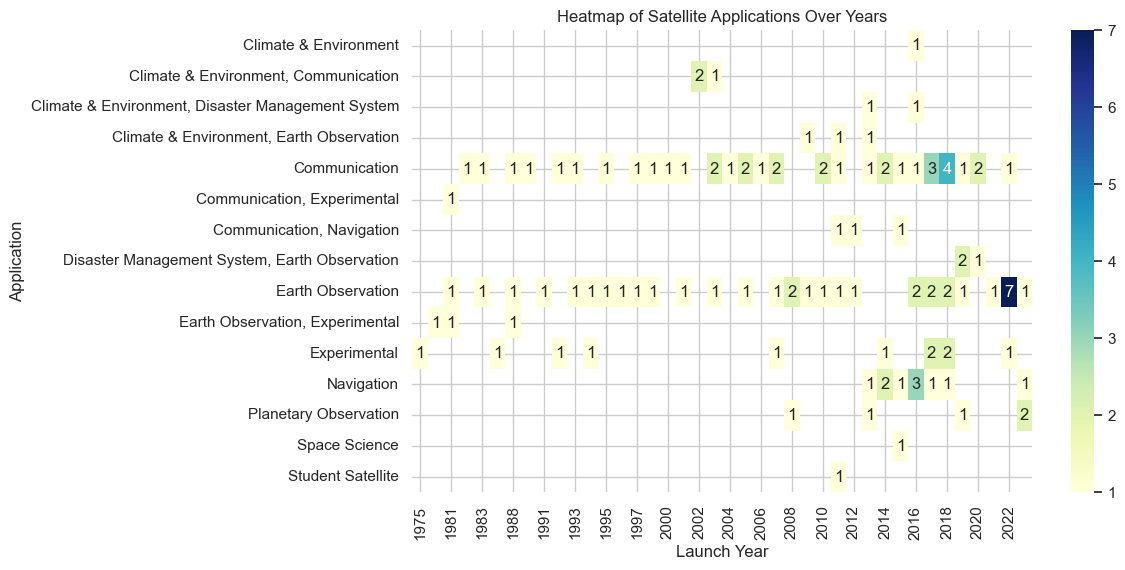

In [22]:
# Create a pivot table counting applications per year
heatmap_data = df.pivot_table(index='Application', columns='Launch_Year', aggfunc='size', fill_value=0)

# masking 0 values
mask = heatmap_data == 0

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', mask=mask)

# Naming the titles and labels
plt.title("Satellite Applications Over Years")
plt.xlabel("Launch Year")
plt.ylabel("Application")

# display plot
plt.show()

#### 5. Bar graph for distribution of launch vehicles based on the number of satellites launched

C:\Users\f51p2\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


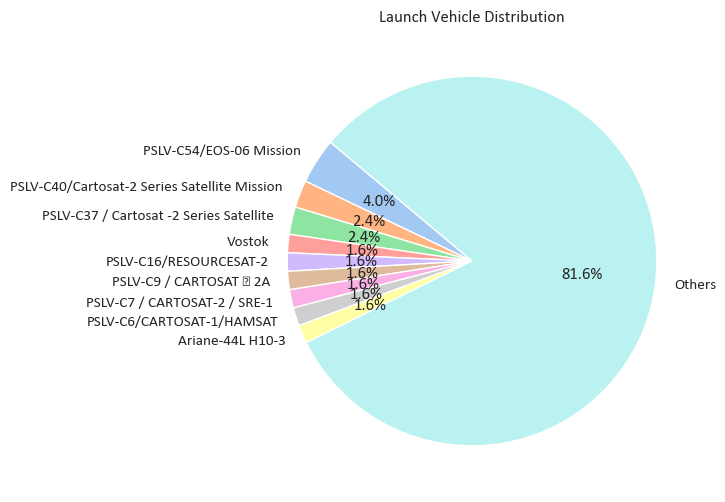

In [32]:
# Calculate the distribution of launch vehicles
launch_vehicles = df['Launch_Vehicle'].value_counts()

# Select top 9 vehicles and sum others
top_vehicles = launch_vehicles.nlargest(9)
others = launch_vehicles[~launch_vehicles.index.isin(top_vehicles.index)].sum()

# Create a new Series for "Others"
others_series = pd.Series({'Others': others})

# Combine top vehicles and others into a single Series
launch_vehicles_plot = pd.concat([top_vehicles, others_series])

# Plotting the pie chart
plt.figure(figsize=(12, 6))

# select a font to compensate glyph error
plt.rcParams['font.family'] = 'Calibri'

plt.pie(launch_vehicles_plot, labels=launch_vehicles_plot.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Launch Vehicle Distribution")
plt.show()

### Conclusion
1. The dataset provides insights into ISRO’s satellite launch history, including success rates, launch vehicles, and applications.
2. A higher number of launches have been successful compared to unsuccessful ones.
3. Most launches occurred in recent years, with a steady increase in launch frequency over time.
4. The majority of satellites were placed in Low Earth Orbit (LEO).
5. Earth Observation and experimental applications were prominent uses for ISRO satellites.



<div style="text-align: center;">
    <img src="isro_satellite_image.png" width=4000" />
</di>
